# Lab 3: Unsupervised Learning (Advanced Clustering)

For this lab we will use Scikit-Learn’s API, sklearn.datasets, which allows us to access a famous dataset for linguistic analysis, the 20newsgroups dataset. A newsgroup is an online user discussion group, such as a forum. Sklearn allows us to access different categories of content. We will use texts that have to do with technology, religion and sport.

More details about the dataset: https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html 

Your task is to perform clustering on the given dataset. 

**Submission: submit via onq.** 


In [335]:
#https://github.com/khyatith/Clustering-newsgroup-dataset/blob/master/Volley.py

# **Import libraries**

In [336]:
# Import needed libraries. E.g., pandas, sklearn, nltk, etc. 
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
import pandas as pd
from nltk.corpus import stopwords
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import PCA
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Task 1: Read the dataset and report the basic statistics of the dataset
import data from sklearn.datasets and selecte pre-defined categories:

from sklearn.datasets import fetch_20newsgroups

categories = [
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'alt.atheism',
]
dataset = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, remove=('headers', 'footers', 'quotes'))


# **Read the dataset**

In [337]:
# TODO code for task 1
categories = [ 'comp.graphics', 'comp.os.ms-windows.misc', 'rec.sport.baseball', 'rec.sport.hockey', 'alt.atheism', ]
dataset = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, remove=('headers', 'footers', 'quotes'))

# **Data Exploration**

In [338]:
dataset.target_names # names of Target

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'rec.sport.baseball',
 'rec.sport.hockey']

In [339]:
dataset.filenames.shape 

(2852,)

In [340]:
dataset.target.shape

(2852,)

In [341]:
data=dataset.data
target=dataset.target


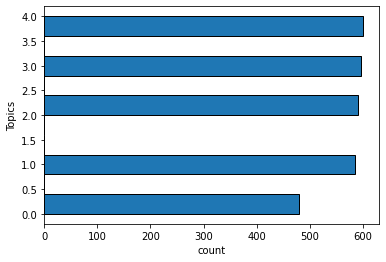

In [342]:
plt.hist(target,  edgecolor='black',orientation='horizontal',label=dataset.target_names);
plt.xlabel('count');
plt.ylabel('Topics');

# **Create Dataframe**

In [343]:
dataFrame = pd.DataFrame()
dataFrame["topics"]=data
dataFrame["target"]=target



# **Describe Values**

In [344]:
#decribe 
dataFrame.describe()

target
count  2852.000000
mean      2.088710
std       1.386227
min       0.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       4.000000

# **Check Nans Values**

In [345]:
#info
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2852 entries, 0 to 2851
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   topics  2852 non-null   object
 1   target  2852 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 44.7+ KB


In [346]:
dataFrame.isna().sum()  # here represent how much data are missing
# here no missing values

topics    0
target    0
dtype: int64

Task 2: Data cleaning.
Use standard text preprocessing steps to preprocess raw textual content. 
A sample preprocessing function is provided as below.

def preprocess_text(text: str, remove_stopwords: bool) -> str:
    """This utility function sanitizes a string by:
    - removing links
    - removing special characters
    - removing numbers
    - removing stopwords
    - transforming in lowercase
    - removing excessive whitespaces
    Args:
        text (str): the input text you want to clean
        remove_stopwords (bool): whether or not to remove stopwords
    Returns:
        str: the cleaned text
    """

    # remove links
    text = re.sub(r"http\S+", "", text)
    # remove special chars and numbers
    text = re.sub("[^A-Za-z]+", " ", text)
    # remove stopwords
    if remove_stopwords:
        # 1. tokenize
        tokens = nltk.word_tokenize(text)
        # 2. check if stopword
        tokens = [w for w in tokens if not w.lower() in stopwords.words("english")]
        # 3. join back together
        text = " ".join(tokens)
    # return text in lower case and stripped of whitespaces
    text = text.lower().strip()
    return text

In [347]:
# TODO code for task 2

def preprocess_text(text: str, remove_stopwords: bool):
    """This utility function sanitizes a string by:
    - removing links
    - removing special characters
    - removing numbers
    - removing stopwords
    - transforming in lowercase
    - removing excessive whitespaces
    Args:
        text (str): the input text you want to clean
        remove_stopwords (bool): whether or not to remove stopwords
    Returns:
        str: the cleaned text
    """

    # remove links
    text = re.sub(r"http\S+", "", text)
    # remove special chars and numbers
    text = re.sub("[^A-Za-z]+", " ", text)
    # remove stopwords
    if remove_stopwords:
        # 1. tokenize
        tokens = nltk.word_tokenize(text)
        # 2. check if stopword
        tokens = [w for w in tokens if not w.lower() in stopwords.words("english")]
        # 3. join back together
        text = " ".join(tokens)
    # return text in lower case and stripped of whitespaces
    text = text.lower().strip()
    return text   

In [348]:
cleaned_topics=[]
for i in dataFrame["topics"]:
  cleaned_topics.append(preprocess_text(text=i,remove_stopwords=True)) 

dataFrame["cleaned_topics"]=cleaned_topics   

Task 3: create vector representation of each document using TF-IDF encoding, if we don't know what is TF-IDF encoding, read this: https://melaniewalsh.github.io/Intro-Cultural-Analytics/05-Text-Analysis/03-TF-IDF-Scikit-Learn.html 

In [349]:
# TODO code for task 3, hint, you can use TfidfVectorizer from sklearn

vectorizer = TfidfVectorizer(max_df=0.5,
                             min_df=2,
                             stop_words='english')


X = vectorizer.fit_transform(dataFrame["cleaned_topics"])
X

<2852x14230 sparse matrix of type '<class 'numpy.float64'>'
	with 135503 stored elements in Compressed Sparse Row format>

Task 4: Apply Kmeans and Kmeans++ on the above extracted document vectors. Brifely describe how would you select the value of k. 
You can use https://scikit-learn.org/stable/modules/generated/sklearn.cluster.k_means.html#sklearn.cluster.k_means 

# **Kmeans++ Algorithm With Performance**

In [350]:
# TODO code for Task 4. Note, you just need to change init parameter to swtich between random intilization and k-means++ initialization. 
#init{‘k-means++’, ‘random’}, callable or array-like of shape (n_clusters, n_features), default=’k-means++’

#clustering

km = KMeans(n_clusters=5, init='k-means++', max_iter=100, n_init=1)

km.fit(X)


#Performance
print("Homogeneity: %0.3f" % metrics.homogeneity_score(dataFrame["target"], km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(dataFrame["target"], km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(dataFrame["target"], km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, km.labels_, sample_size=1000))
mutual_info_score_plus=metrics.mutual_info_score(dataFrame["target"], km.labels_)
print("mutual_info_score_plus_plus",mutual_info_score_plus)

Homogeneity: 0.314
Completeness: 0.359
V-measure: 0.335
Silhouette Coefficient: 0.006
mutual_info_score_plus_plus 0.5035943621351977


# **Kmeans Algorithm With Performance**

In [351]:
km = KMeans(n_clusters=5, init='random', max_iter=100, n_init=1)

km.fit(X)


#Performance
print("Homogeneity: %0.3f" % metrics.homogeneity_score(dataFrame["target"], km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(dataFrame["target"], km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(dataFrame["target"], km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, km.labels_, sample_size=1000))
KMeansScore=metrics.mutual_info_score(dataFrame["target"], km.labels_)
print("mutual_info_score",KMeansScore)

Homogeneity: 0.355
Completeness: 0.471
V-measure: 0.405
Silhouette Coefficient: 0.009
mutual_info_score 0.5703979584049315


Task 5: perform tricks on the above two approaches by considering the high-dimensional nature of the dataset, you can consider PCA (from sklearn.decomposition import PCA), or other methods. 

In [352]:
# TODO for Task 5
from sklearn.decomposition import TruncatedSVD
from scipy import sparse as sp

clf = TruncatedSVD(2)
Xpca = clf.fit_transform(X)


# **Kmeans++ PCA**

In [353]:

#clustering

km = KMeans(n_clusters=5, init='k-means++', max_iter=100, n_init=1)

km.fit(Xpca)


#Performance
print("Homogeneity: %0.3f" % metrics.homogeneity_score(dataFrame["target"], km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(dataFrame["target"], km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(dataFrame["target"], km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, km.labels_, sample_size=1000))
mutual_info_score_plus_pca=metrics.mutual_info_score(dataFrame["target"], km.labels_)
print("mutual_info_score_plus_plus_pca",mutual_info_score_plus_pca)

Homogeneity: 0.290
Completeness: 0.309
V-measure: 0.299
Silhouette Coefficient: -0.001
mutual_info_score_plus_plus_pca 0.46633947403011994


# **Kmean PCA**

In [354]:
km = KMeans(n_clusters=5, init='random', max_iter=100, n_init=1)

km.fit(Xpca)


#Performance
print("Homogeneity: %0.3f" % metrics.homogeneity_score(dataFrame["target"], km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(dataFrame["target"], km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(dataFrame["target"], km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, km.labels_, sample_size=1000))
KMeansScore_pca=metrics.mutual_info_score(dataFrame["target"], km.labels_)
print("mutual_info_score_pca",KMeansScore_pca)

Homogeneity: 0.291
Completeness: 0.309
V-measure: 0.300
Silhouette Coefficient: -0.001
mutual_info_score_pca 0.46797172374906726


Task 6: compare the performance of the above four approaches on the given dataset using mutual information based scores: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mutual_info_score.html 

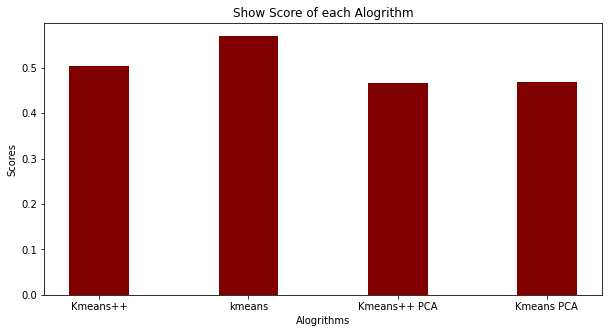

In [355]:
# TODO for Task 6
# creating the dataset
data = {'Kmeans++':mutual_info_score_plus, 'kmeans':KMeansScore, 'Kmeans++ PCA':mutual_info_score_plus_pca,
        'Kmeans PCA':KMeansScore_pca}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Alogrithms")
plt.ylabel("Scores")
plt.title("Show Score of each Alogrithm")
plt.show()

In [365]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

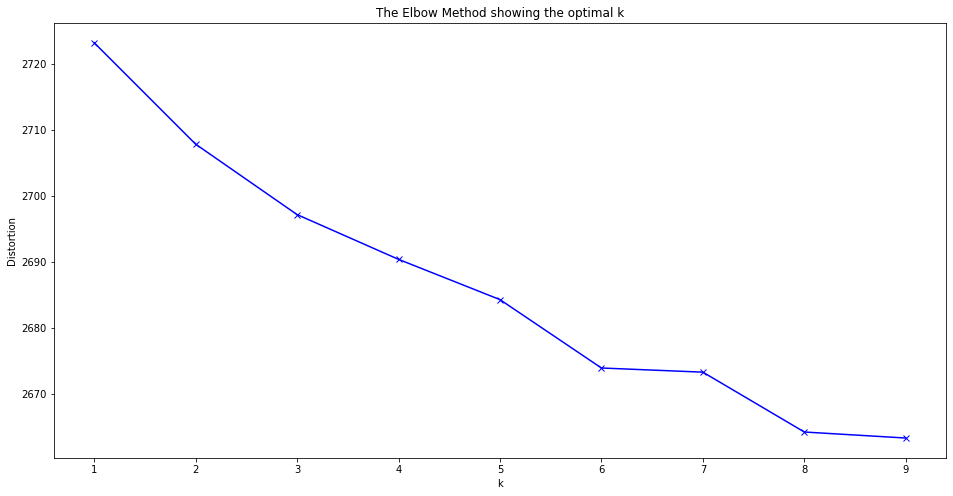

In [366]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
# HERE the best k is 5 or 6
